# 단순선형회귀 KERAS

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x_data = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
y_data = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

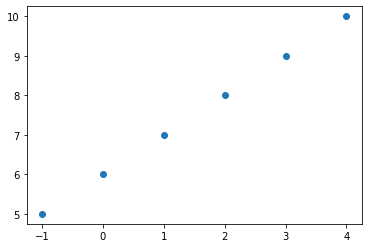

In [ ]:
plt.plot(x_data, y_data, 'o')
plt.show()

## model 만들기

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

model = tf.keras.Sequential([
    layers.Dense(1, input_dim = 1)                     
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# unit이 1개이고 parameter는 W1, b 2개밖에 없음 

In [ ]:
# 모델 생성
sgd = tf.keras.optimizers.SGD(learning_rate=0.01) # optimizer
mse = tf.keras.losses.MeanSquaredError() # cost func

model.compile(optimizer = sgd, loss = mse)

In [ ]:
# 학습 실행
history = model.fit(x_data, y_data, epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 0s 258ms/step - loss: 48.4751
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 41.1782
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 35.3748
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 30.7478
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 27.0476
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 24.0778
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 21.6839
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 19.7441
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 18.1628
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 16.8648
Epoch 11/300
1/1 [==============================] - 0s 11ms/step - loss: 15.7907
Epoch 12/300
1/1 [==============================] - 0s 10ms/step - loss: 14.8938
Epoch 13/300
1/1 [=====================

In [ ]:
history.history.keys()

loss = history.history['loss']

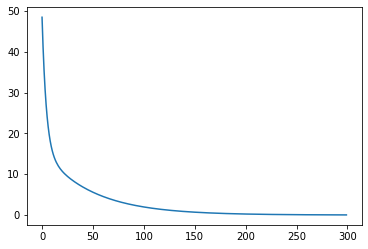

In [ ]:
plt.plot(range(300), loss)
plt.show()

In [28]:
W, b = model.get_weights()
W, b

(array([[1.0754526]], dtype=float32), array([5.7660723], dtype=float32))

In [29]:
y_pred = model.predict(x_data)

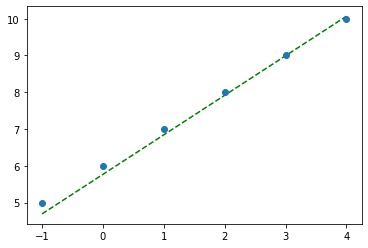

In [32]:
plt.plot(x_data, y_pred, 'g--')
plt.plot(x_data, y_data, 'o')
plt.show()

## 점수 예측

In [33]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
score = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FLYAI/datasets/student_scores.csv')

In [35]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
from tensorflow.keras import layers
from tensorflow.keras import Model

model_score = tf.keras.Sequential([
    layers.Dense(1, input_dim = 1)                     
])

In [62]:
model_score.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 모델 생성 (unit = 1, optimizer = SGD, cost_func = mse)
sgd = tf.keras.optimizers.SGD(learning_rate=0.02) # optimizer
mse = tf.keras.losses.MeanSquaredError() # cost func

model_score.compile(optimizer = sgd, loss = mse)

In [64]:
x = score.iloc[:, 0] #hours
y = score.iloc[:, 1] #score

In [65]:
model_score.fit(x, y, epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 0s 284ms/step - loss: 3832.3872
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 331.4699
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 53.0448
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 30.9005
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 29.1379
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 28.9963
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 28.9836
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 28.9812
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 28.9796
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 28.9782
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 28.9767
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 28.9753
Epoch 13/300
1/1 [=========================